In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import LinearNDInterpolator
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D 

In [6]:
def calc_z(x, y):
    return np.sqrt(x**2 + y**2)

xv = np.linspace(-3, 3, 10)
yv = np.linspace(-3, 3, 10)
xm, ym = np.meshgrid(xv, yv)
zv = calc_z(xm, ym)

xf = np.linspace(-3, 3, 100)
yf = np.linspace(-3, 3, 100)
xfm, yfm = np.meshgrid(xf, yf)
pts = np.c_[xm.ravel(), ym.ravel()]
vals = zv.ravel()

interp = LinearNDInterpolator(pts, vals)
zf = interp(xfm, yfm) 

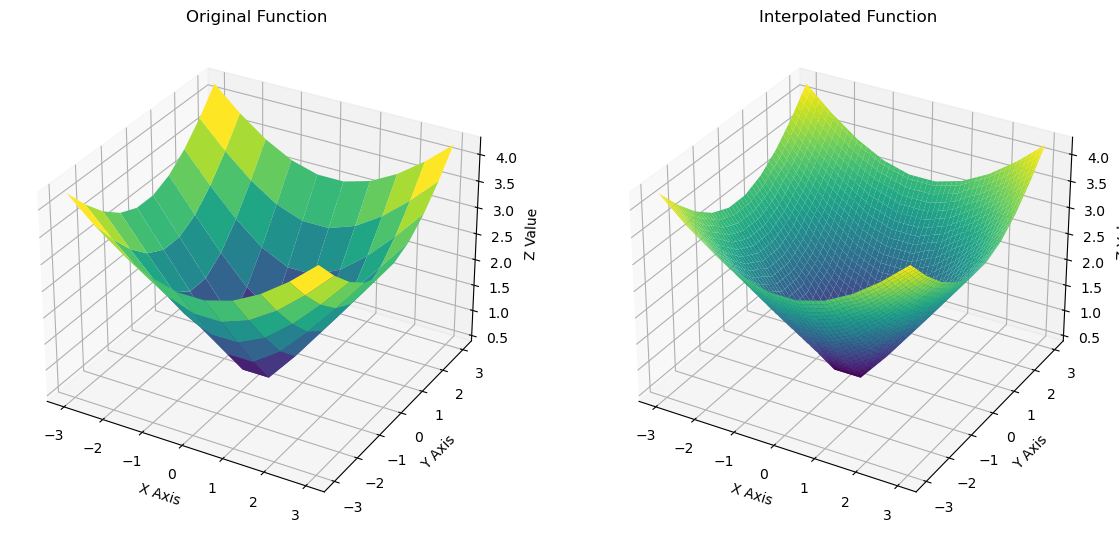

In [7]:
fig = plt.figure(figsize=(14, 7))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
s1 = ax1.plot_surface(xm, ym, zv, cmap='viridis', edgecolor='none')
ax1.set_title('Original Function')
ax1.set_xlabel('X Axis')
ax1.set_ylabel('Y Axis')
ax1.set_zlabel('Z Value')

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
s2 = ax2.plot_surface(xfm, yfm, zf, cmap='viridis', edgecolor='none')
ax2.set_title('Interpolated Function')
ax2.set_xlabel('X Axis')
ax2.set_ylabel('Y Axis')
ax2.set_zlabel('Z Value')

plt.show()

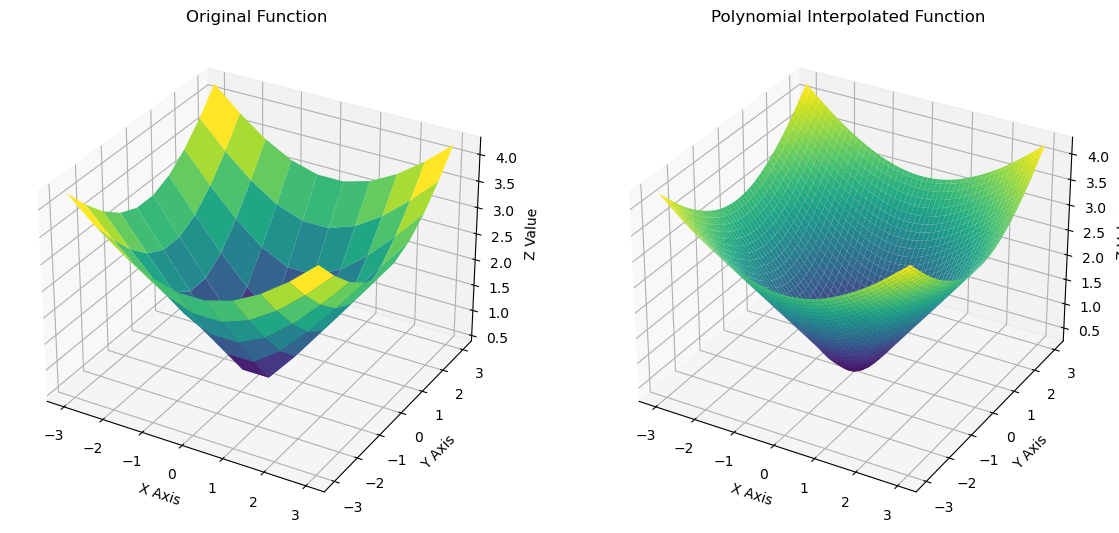

In [8]:
zf_poly = griddata(pts, vals, (xfm, yfm), method='cubic')

fig = plt.figure(figsize=(14, 7))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
s1 = ax1.plot_surface(xm, ym, zv, cmap='viridis', edgecolor='none')
ax1.set_title('Original Function')
ax1.set_xlabel('X Axis')
ax1.set_ylabel('Y Axis')
ax1.set_zlabel('Z Value')

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
s2 = ax2.plot_surface(xfm, yfm, zf_poly, cmap='viridis', edgecolor='none')
ax2.set_title('Polynomial Interpolated Function')
ax2.set_xlabel('X Axis')
ax2.set_ylabel('Y Axis')
ax2.set_zlabel('Z Value')

plt.show()